<a href="https://colab.research.google.com/github/AzizKna/IML-Data/blob/main/Aziz_IML_ExamC_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the data and packages
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import scipy.stats
import statsmodels.api as sm
from statsmodels.imputation import mice

Webshop_CSV = pd.read_csv('https://raw.githubusercontent.com/AzizKna/IML-Data/main/1580953webshop.csv')
Webshop_CSV

,Purchase_Amount,Time_Spent_on_Website,Number_of_products_browsed,Pictures,Shipping_Time,Review_rating,Find_website,Ease_of_purchase,Age,Device
0,614.79,1004,22,4.0,2.89,3.7,Search_Engine,4.0,41,Mobile
1,617.32,878,20,4.2,3.25,4.0,Social_Media_Advertisement,3.0,44,Mobile
2,449.83,224,7,3.2,2.40,4.0,Social_Media_Advertisement,4.0,49,Mobile
3,667.53,-999,-999,4.2,4.82,3.5,Search_Engine,4.0,56,Mobile
4,622.03,799,20,3.2,4.11,4.2,Search_Engine,4.0,42,PC
...,...,...,...,...,...,...,...,...,...,...
1885,638.32,1038,23,2.7,2.67,3.6,Social_Media_Advertisement,4.0,41,Mobile
1886,594.28,1000,25,2.6,1.36,3.6,Search_Engine,5.0,46,PC
1887,704.86,-999,-999,3.6,2.31,3.8,Social_Media_Advertisement,4.0,42,PC
1888,611.88,981,24,3.1,1.92,4.0,Search_Engine,4.0,47,PC


In [2]:
#removing the missing value's 
# Create a copy of the dataset
Webshop_CSV_copy = Webshop_CSV.copy()
# Check for missing values in the original dataset
Webshop_CSV.isnull().sum()

Purchase_Amount                 0
Time_Spent_on_Website           0
Number_of_products_browsed      0
Pictures                        0
Shipping_Time                   0
Review_rating                   0
Find_website                  130
Ease_of_purchase              226
Age                             0
Device                          0
dtype: int64

In [3]:
# Create a new copy of the original dataset
Clean_Webshop_CSV = Webshop_CSV_copy.copy()
# Remove missing values from the copy
Clean_Webshop_CSV.dropna(inplace=True)
# Check for missing values in the cleaned copy
Clean_Webshop_CSV.isnull().sum()

Purchase_Amount               0
Time_Spent_on_Website         0
Number_of_products_browsed    0
Pictures                      0
Shipping_Time                 0
Review_rating                 0
Find_website                  0
Ease_of_purchase              0
Age                           0
Device                        0
dtype: int64

In [4]:
#creating Dummy variables 
Clean_Webshop_Dummies = pd.get_dummies(Clean_Webshop_CSV['Device'])
Clean_Webshop_CSV = pd.concat([Clean_Webshop_CSV, Clean_Webshop_Dummies], axis=1)
Clean_webshop_Dummies_find_website = pd.get_dummies(Clean_Webshop_CSV['Find_website'])
Clean_Webshop_CSV = pd.concat([Clean_Webshop_CSV, Clean_webshop_Dummies_find_website], axis=1)

In [8]:
from statsmodels.formula.api import ols
#dealing with outliers
#first create a new dataset for the outliers
Clean_Webshop_Outlier = Clean_Webshop_CSV.copy()
#create a variable for the sample zise 
n = len(Clean_Webshop_Outlier)


#Creating single regression & outliers time spent on website
SingleRegression1_Time_Spent_on_Website = ols('Purchase_Amount ~ Time_Spent_on_Website', data = Clean_Webshop_Outlier).fit()
print(SingleRegression1_Time_Spent_on_Website.summary())
CooksD = SingleRegression1_Time_Spent_on_Website.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier1 = Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
mask = Clean_Webshop_Outlier['Time_Spent_on_Website']==-999
Clean_Webshop_Outlier = Clean_Webshop_Outlier[~mask]

print(SingleRegression1_Time_Spent_on_Website.summary())
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     657.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          3.00e-121
Time:                        20:25:06   Log-Likelihood:                -9109.8
No. Observations:                1555   AIC:                         1.822e+04
Df Residuals:                    1553   BIC:                         1.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               484.90

In [9]:
#Creating single regression & checking outliers number of products browsed
SingleRegression2_Number_of_products_browsed = ols('Purchase_Amount ~ Number_of_products_browsed', data = Clean_Webshop_Outlier).fit()
print(SingleRegression2_Number_of_products_browsed.summary())

CooksD = SingleRegression2_Number_of_products_browsed.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier2 = Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     1553.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          2.28e-234
Time:                        20:26:10   Log-Likelihood:                -8611.8
No. Observations:                1517   AIC:                         1.723e+04
Df Residuals:                    1515   BIC:                         1.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [10]:
#Creating single regression & checking outliers number pictures
SingleRegression3_Pictures = ols('Purchase_Amount ~ Pictures', data = Clean_Webshop_Outlier).fit()
print(SingleRegression3_Pictures.summary())

CooksD = SingleRegression3_Pictures.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier3 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1187
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.731
Time:                        20:26:49   Log-Likelihood:                -9146.9
No. Observations:                1517   AIC:                         1.830e+04
Df Residuals:                    1515   BIC:                         1.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    590.4297      8.770     67.327      0.0

In [11]:
#Creating single regression & Shipping time
SingleRegression4_Shipping_Time = ols('Purchase_Amount ~ Shipping_Time', data = Clean_Webshop_Outlier).fit()
print(SingleRegression4_Shipping_Time.summary())

CooksD = SingleRegression4_Shipping_Time.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier4 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2813
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.596
Time:                        20:27:55   Log-Likelihood:                -9146.8
No. Observations:                1517   AIC:                         1.830e+04
Df Residuals:                    1515   BIC:                         1.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       589.0200      8.504     69.267

In [12]:
#Creating single regression & checking outliers review rating
SingleRegression5_Review_rating = ols('Purchase_Amount ~ Review_rating', data = Clean_Webshop_Outlier).fit()
print(SingleRegression5_Review_rating.summary())

CooksD = SingleRegression5_Review_rating.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier5 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     30.23
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.49e-08
Time:                        20:28:52   Log-Likelihood:                -9132.0
No. Observations:                1517   AIC:                         1.827e+04
Df Residuals:                    1515   BIC:                         1.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       478.9840     20.951     22.862

In [13]:
#Creating single regression & checking outliers Ease of purchase
SingleRegression6_Ease_of_purchase = ols('Purchase_Amount ~ Ease_of_purchase', data = Clean_Webshop_Outlier).fit()
print(SingleRegression6_Ease_of_purchase.summary())

CooksD = SingleRegression6_Ease_of_purchase.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier6 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2034
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.652
Time:                        20:29:32   Log-Likelihood:                -9146.8
No. Observations:                1517   AIC:                         1.830e+04
Df Residuals:                    1515   BIC:                         1.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          585.1027     18.395  

In [15]:
#Creating single regression & checking outliers Device
SingleRegression7_Device = ols('Purchase_Amount ~ PC', data = Clean_Webshop_Outlier).fit()
print(SingleRegression7_Device.summary())

CooksD = SingleRegression7_Device.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier7 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

SingleRegression7_V2_Device = ols('Purchase_Amount ~ Mobile', data = Clean_Webshop_Outlier).fit()
print(SingleRegression7_V2_Device.summary())

CooksD = SingleRegression7_V2_Device.get_influence().cooks_distance
Clean_Webshop_Outlier['Outlier'] = CooksD[0] > 4/n
Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier7_1 =Clean_Webshop_Outlier[Clean_Webshop_Outlier.Outlier == True]
Clean_Webshop_Outlier = Clean_Webshop_Outlier.drop('Outlier', axis=1)

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.145
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.143
Time:                        20:32:13   Log-Likelihood:                -9145.9
No. Observations:                1517   AIC:                         1.830e+04
Df Residuals:                    1515   BIC:                         1.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    587.2953      4.855    120.979      0.0

In [17]:
#Creating multiple regression found website
MultipleRegression8_Find_website = ols('Purchase_Amount ~ Friends_or_Family + Search_Engine + Social_Media_Advertisement', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression8_Find_website.summary())

MultipleRegression8_V2_Find_website = ols('Purchase_Amount ~ Other + Search_Engine + Social_Media_Advertisement', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression8_V2_Find_website.summary())

#Creating single regression Age 
SingleRegression9_age = ols('Purchase_Amount ~ Age', data = Clean_Webshop_Outlier).fit()
print(SingleRegression9_age.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.257
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.288
Time:                        20:42:28   Log-Likelihood:                -9145.1
No. Observations:                1517   AIC:                         1.830e+04
Df Residuals:                    1513   BIC:                         1.832e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [18]:
#Checking for multicollinearity
correlation_matrix = Clean_Webshop_Outlier.corr()
print(correlation_matrix)

MultipleRegression10_multicollinearity_check = ols('Purchase_Amount ~ Number_of_products_browsed + Time_Spent_on_Website', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression10_multicollinearity_check.summary())

MultipleRegression11_V2 = ols('Purchase_Amount ~ Time_Spent_on_Website + Age + Number_of_products_browsed + Pictures + Shipping_Time + Review_rating + Ease_of_purchase + Age + PC + Other + Search_Engine + Social_Media_Advertisement', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression11_V2.summary())

                            Purchase_Amount  Time_Spent_on_Website  \
Purchase_Amount                    1.000000               0.739115   
Time_Spent_on_Website              0.739115               1.000000   
Number_of_products_browsed         0.711441               0.974804   
Pictures                           0.008851               0.036969   
Shipping_Time                      0.013624               0.034332   
Review_rating                      0.139873              -0.020564   
Ease_of_purchase                   0.011587              -0.037344   
Age                               -0.104377               0.047915   
Mobile                            -0.037603               0.002831   
PC                                 0.037603              -0.002831   
Friends_or_Family                  0.037000               0.006034   
Other                              0.018032               0.037573   
Search_Engine                     -0.040601              -0.008789   
Social_Media_Adverti

<ipython-input-18-21ed6c96d4c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Clean_Webshop_Outlier.corr()


<Axes: xlabel='Time_Spent_on_Website', ylabel='Purchase_Amount'>

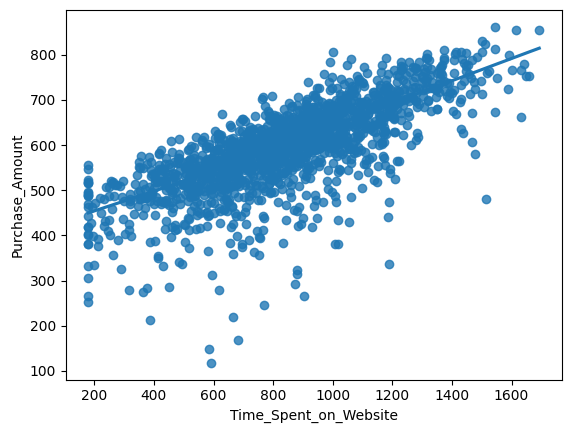

In [28]:
#Checking for non-liniar relationship
#Checking relationship time spent on website
sns.regplot(x = 'Time_Spent_on_Website', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)


<Axes: xlabel='Number_of_products_browsed', ylabel='Purchase_Amount'>

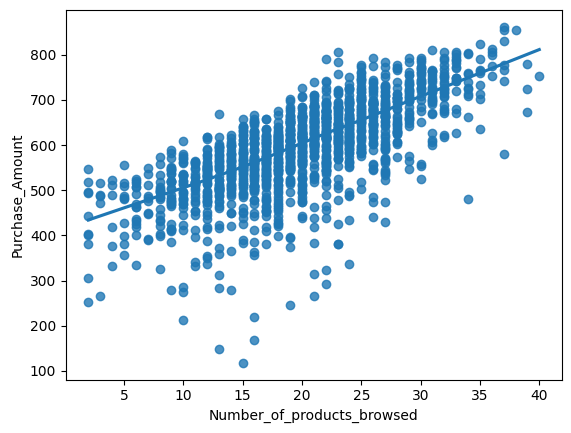

In [21]:
#Checking relationship number of products browsed
sns.regplot(x = 'Number_of_products_browsed', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)

<Axes: xlabel='Pictures', ylabel='Purchase_Amount'>

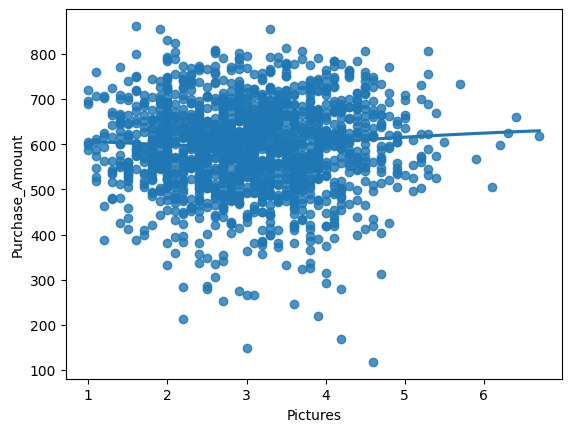

In [23]:
#Checking relationship pictures
sns.regplot(x = 'Pictures', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)


<Axes: xlabel='Shipping_Time', ylabel='Purchase_Amount'>

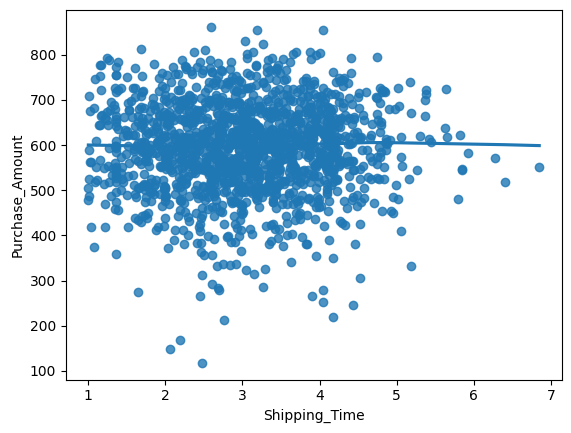

In [24]:

#Checking relationship shipping time
sns.regplot(x = 'Shipping_Time', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)


<Axes: xlabel='Review_rating', ylabel='Purchase_Amount'>

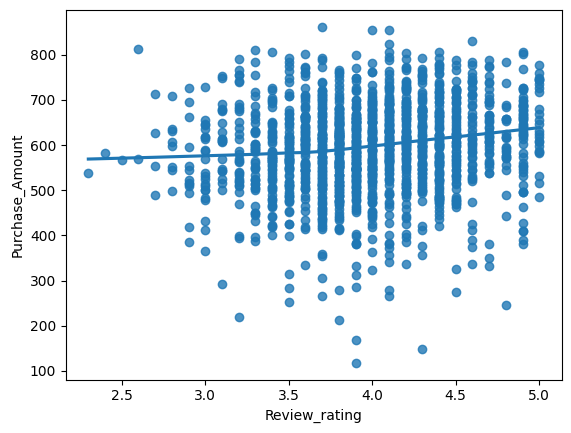

In [25]:

#Checking relationship review rating
sns.regplot(x = 'Review_rating', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)



<Axes: xlabel='Ease_of_purchase', ylabel='Purchase_Amount'>

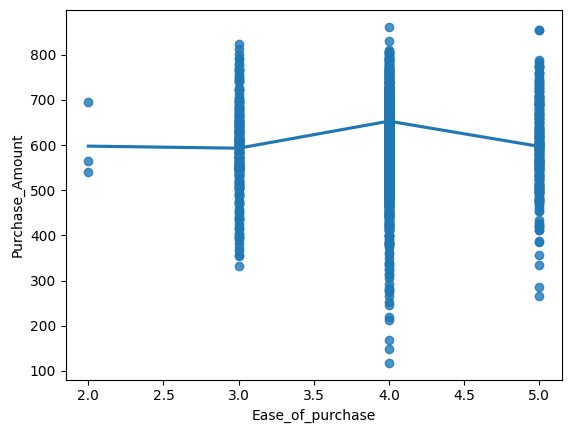

In [26]:
#Checking relationship ease of products
sns.regplot(x = 'Ease_of_purchase', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)



<Axes: xlabel='Age', ylabel='Purchase_Amount'>

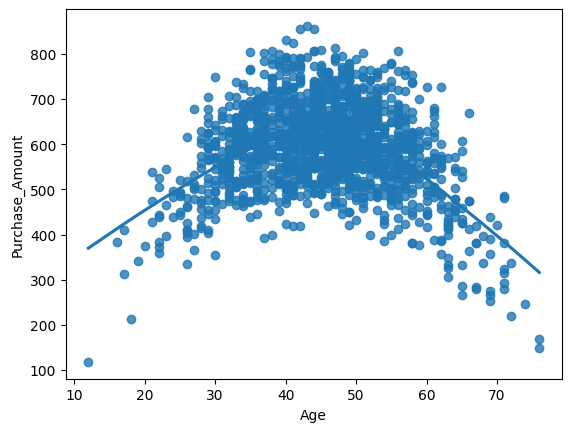

In [27]:
#Checking relationship age
sns.regplot(x = 'Age', y = 'Purchase_Amount', data = Clean_Webshop_Outlier, lowess = True)

In [29]:
#polynomial transformation 
Age2 = pow(Clean_Webshop_Outlier.Age,2)
#comparing the linear model to polynomial model  
SingleRegression9_age = ols('Purchase_Amount ~ Age', data = Clean_Webshop_Outlier).fit()
print(SingleRegression9_age.summary())
model_polynomial = ols('Purchase_Amount ~ Age + Age2', data = Clean_Webshop_Outlier).fit()
print(model_polynomial.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.69
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.64e-05
Time:                        20:53:10   Log-Likelihood:                -9138.6
No. Observations:                1517   AIC:                         1.828e+04
Df Residuals:                    1515   BIC:                         1.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    641.5558     12.085     53.086      0.0

In [30]:
#Create the eventual model for the APA table
MultipleRegression12_model1 = ols('Purchase_Amount ~  Age + Age2 + Time_Spent_on_Website + Shipping_Time + Review_rating + Ease_of_purchase + PC + Ease_of_purchase + Friends_or_Family + Social_Media_Advertisement', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression12_model1.summary())

#The following code for creating APA style tables only works in Jupyterlab
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
MultipleRegression12_model1 = ols('Purchase_Amount ~  Age + Age2 + Time_Spent_on_Website + Shipping_Time + Review_rating + Ease_of_purchase + PC + Ease_of_purchase + Friends_or_Family + Social_Media_Advertisement', data = Clean_Webshop_Outlier).fit()
print(MultipleRegression12_model1.summary())

Table = Stargazer([MultipleRegression12_model1])
Table.title =('Model predict purchase amount')
Table.show_model_numbers(False) 
Table.significant_digits(2)
Table.covariate_order(['Intercept', 'Age', 'Age2', 'Ease_of_purchase', 'Review_rating', 'Shipping_Time', 'Time_Spent_on_Website', 'PC', 'Friends_or_Family', 'Social_Media_Advertisement'])
Table.rename_covariates({'Ease_of_purchase':'Ease of purchase', 'Review_rating' : 'Review rating', 'Shipping_Time' : 'Shipping time', 'Time_Spent_on_Website' : 'Time spent on website', 'Friends_or_Family' : 'Friend or family', 'Search_Engine' : 'Search engine', 'Social_Media_Advertisement' : 'Social media advertisement'}) 
HTML(Table.render_html())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1210.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:54:27   Log-Likelihood:                -7548.6
No. Observations:                1517   AIC:                         1.512e+04
Df Residuals:                    1507   BIC:                         1.517e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [31]:
#standarization of variables
Clean_Webshop_Standardized = Clean_Webshop_Outlier.copy()
Clean_Webshop_Standardized[['Time_Spent_on_Website', 'Shipping_Time', 'Review_rating', 'Ease_of_purchase', 'Age']] = StandardScaler().fit_transform(Clean_Webshop_Standardized[['Time_Spent_on_Website', 'Shipping_Time', 'Review_rating', 'Ease_of_purchase', 'Age']])

#creating a model with the standardized variables
MultipleRegression13_model2 = ols('Purchase_Amount ~  Age + Age2 + Time_Spent_on_Website + Shipping_Time + Review_rating + Ease_of_purchase + PC + Ease_of_purchase + Friends_or_Family + Social_Media_Advertisement', data = Clean_Webshop_Standardized).fit()
print(MultipleRegression13_model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1210.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:56:25   Log-Likelihood:                -7548.6
No. Observations:                1517   AIC:                         1.512e+04
Df Residuals:                    1507   BIC:                         1.517e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [32]:
#creating a APA table with two models
Table = Stargazer([MultipleRegression12_model1,MultipleRegression13_model2])
Table.title =('Model predict purchase amount')
Table.show_model_numbers(False) 
Table.significant_digits(2)
Table.covariate_order(['Intercept', 'Age', 'Age2', 'Ease_of_purchase', 'Review_rating', 'Shipping_Time', 'Time_Spent_on_Website', 'PC', 'Friends_or_Family', 'Social_Media_Advertisement'])
Table.rename_covariates({'Ease_of_purchase':'Ease of purchase', 'Review_rating' : 'Review rating', 'Shipping_Time' : 'Shipping time', 'Time_Spent_on_Website' : 'Time spent on website', 'Friends_or_Family' : 'Friend or family', 'Search_Engine' : 'Search engine', 'Social_Media_Advertisement' : 'Social media advertisement'}) 

HTML(Table.render_html())

In [33]:
#predict a customer that's not in the dataset 
#creating the variable Age2 as a column to the data frame
Clean_Webshop_Outlier['Age2'] = Clean_Webshop_Outlier['Age']**2



#calculate the Age 2 for the new customer
new_customer_age = 35
new_customer_age2 = new_customer_age ** 2

New_customer = pd.DataFrame([[723,20, 3.4, 2.6, 4.5, 'Search_Engine' , 4, 35, 'PC', 0, 1, 1 , 0, 0,0, 1225]], columns = ['Time_Spent_on_Website', 'Number_of_products_browsed', 'Pictures', 'Shipping_Time', 'Review_rating', 'Find_website', 'Ease_of_purchase', 'Age', 'Device', 'Mobile', 'PC', 'Friends_or_Family', 'Other', 'Search_Engine', 'Social_Media_Advertisement', 'Age2'])
New_customer['Age2'] = new_customer_age2

print(MultipleRegression12_model1.predict(New_customer))

0    607.578647
dtype: float64


                                         Purchase_Amount  \
Purchase_Amount                                 1.000000   
Time_Spent_on_Website                           0.738562   
Number_of_products_browsed                      0.712631   
Pictures                                        0.010045   
Shipping_Time                                   0.000351   
Review_rating                                   0.138476   
Ease_of_purchase                                0.022949   
Age                                            -0.119917   
Find_website_Friends_or_Family                  0.035238   
Find_website_Other                              0.005363   
Find_website_Search_Engine                     -0.033819   
Find_website_Social_Media_Advertisement         0.020337   
Find_website_nan                               -0.008924   
Device_Mobile                                  -0.042328   
Device_PC                                       0.042328   
Device_nan                              

<Axes: xlabel='Time_Spent_on_Website', ylabel='Purchase_Amount'>

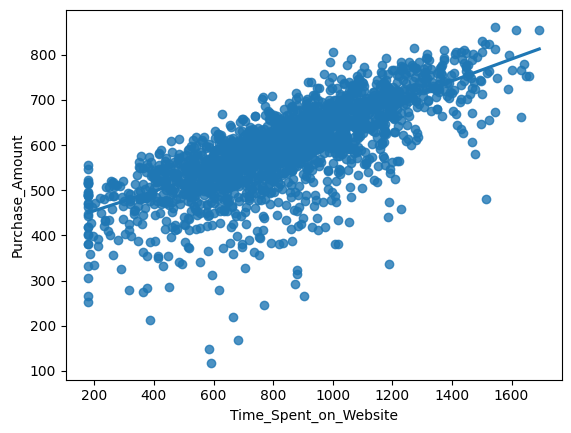

In [36]:
#Dealing with missing values
Webshop_CSV_With_Missing_Values = Webshop_CSV.copy()
Webshop_CSV_With_Missing_Values = pd.get_dummies(Webshop_CSV_With_Missing_Values, dummy_na=True)

#removing outliers
mask1 = Webshop_CSV_With_Missing_Values['Time_Spent_on_Website']==-999
Webshop_CSV_With_Missing_Values = Webshop_CSV_With_Missing_Values[~mask1]

#Checking for multicollinearity
correlation_matrix1 = Webshop_CSV_With_Missing_Values.corr()
print(correlation_matrix1)

#Checking relationship time spent on website
sns.regplot(x = 'Time_Spent_on_Website', y = 'Purchase_Amount', data = Webshop_CSV_With_Missing_Values, lowess = True)



<Axes: xlabel='Number_of_products_browsed', ylabel='Purchase_Amount'>

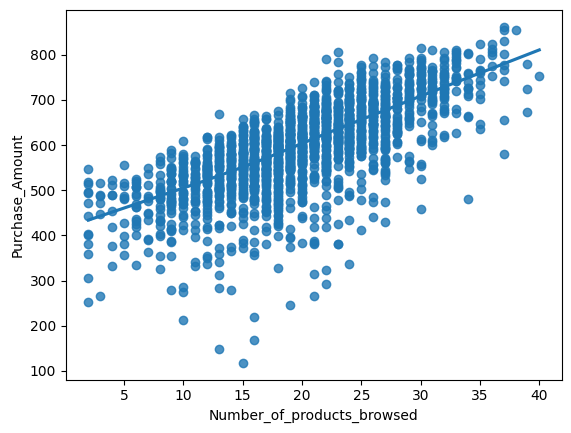

In [37]:

#Checking relationship number of products browsed
sns.regplot(x = 'Number_of_products_browsed', y = 'Purchase_Amount', data = Webshop_CSV_With_Missing_Values, lowess = True)



<Axes: xlabel='Pictures', ylabel='Purchase_Amount'>

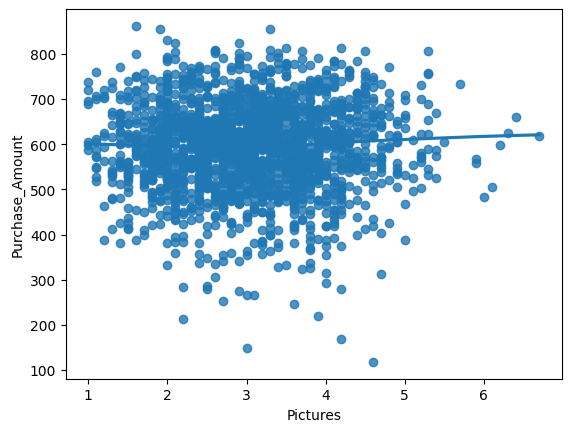

In [38]:
#Checking relationship pictures
sns.regplot(x = 'Pictures', y = 'Purchase_Amount', data = Webshop_CSV_With_Missing_Values, lowess = True)



<Axes: xlabel='Shipping_Time', ylabel='Purchase_Amount'>

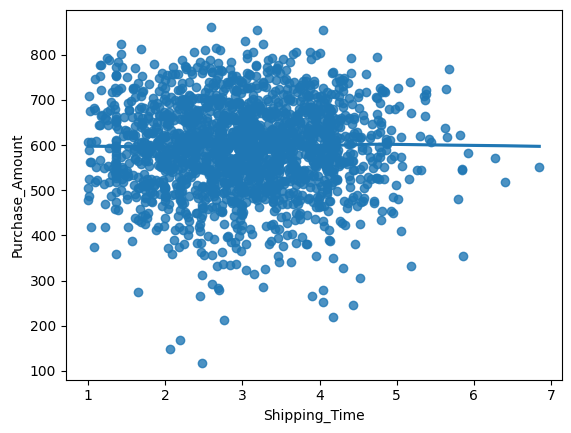

In [39]:
#Checking relationship shipping time
sns.regplot(x = 'Shipping_Time', y = 'Purchase_Amount', data = Webshop_CSV_With_Missing_Values, lowess = True)

<Axes: xlabel='Review_rating', ylabel='Purchase_Amount'>

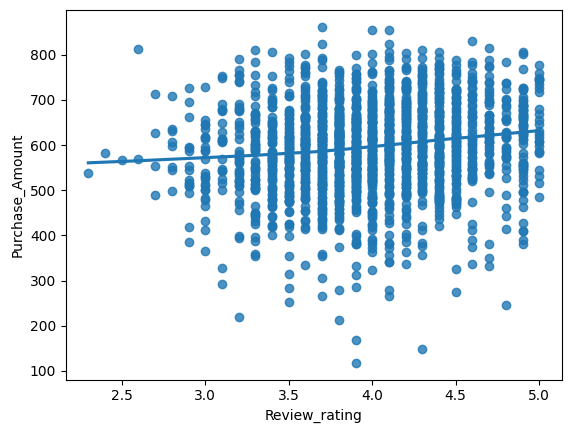

In [40]:
#Checking relationship review rating
sns.regplot(x = 'Review_rating', y = 'Purchase_Amount', data = Webshop_CSV_With_NA, lowess = True)



/usr/local/lib/python3.9/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<Axes: xlabel='Ease_of_purchase', ylabel='Purchase_Amount'>

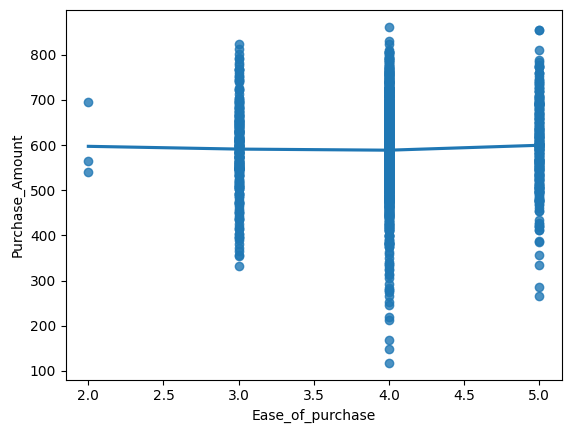

In [41]:
#Checking relationship ease of products
sns.regplot(x = 'Ease_of_purchase', y = 'Purchase_Amount', data = Webshop_CSV_With_NA, lowess = True)


<Axes: xlabel='Age', ylabel='Purchase_Amount'>

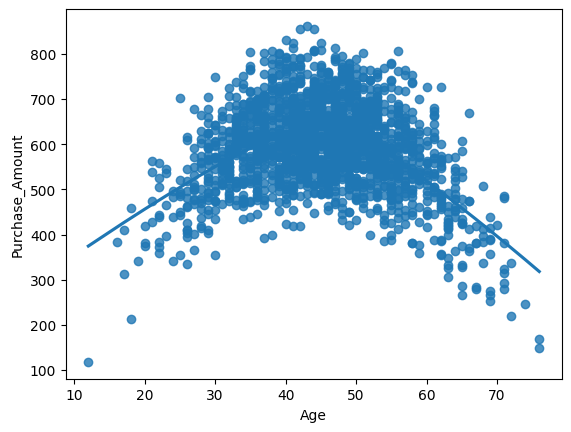

In [44]:
#Checking relationship age
sns.regplot(x = 'Age', y = 'Purchase_Amount', data = Webshop_CSV_With_NA, lowess = True)

In [43]:
#polynomial transformation 
Age2 = pow(Webshop_CSV_With_Missing_Values.Age,2)
Webshop_CSV_With_Missing_Values['Age2'] = Webshop_CSV_With_Missing_Values['Age']**2

#creating a dataset with only the variables that are needed for the model
Webshop_CSV_With_Missing_Values_Only_Variables = Webshop_CSV_With_Missing_Values[['Purchase_Amount', 'Age', 'Age2', 'Time_Spent_on_Website', 'Shipping_Time', 'Review_rating', 'Ease_of_purchase', 'Device_PC', 'Find_website_Friends_or_Family', 'Find_website_Social_Media_Advertisement']].copy()

# Turn the data into a MICE dataset
imp = mice.MICEData(Webshop_CSV_With_Missing_Values_Only_Variables)
model = mice.MICE("Purchase_Amount ~ Age + Age2 + Time_Spent_on_Website + Shipping_Time + Review_rating + Ease_of_purchase + Device_PC + Find_website_Friends_or_Family + Find_website_Social_Media_Advertisement", model_class=sm.OLS, data=imp).fit()

print(model.summary())

                                            Results: MICE
Method:                            MICE                         Sample size:                  1852   
Model:                             OLS                          Scale                         1195.59
Dependent variable:                Purchase_Amount              Num. imputations              10     
-----------------------------------------------------------------------------------------------------
                                          Coef.   Std.Err.    t     P>|t|    [0.025    0.975]   FMI  
-----------------------------------------------------------------------------------------------------
Intercept                               -499.7637  15.9149 -31.4022 0.0000 -530.9563 -468.5710 0.0290
Age                                       34.3388   0.5426  63.2828 0.0000   33.2752   35.4023 0.0004
Age2                                      -0.3929   0.0059 -66.4332 0.0000   -0.4045   -0.3813 0.0004
Time_Spent_on_Website   